In [1]:
from price_calculator import calculate_price

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
start_date = "2020-01-01T00:00:00"
end_date = "2020-12-31T23:59:59"
start_date_sig = datetime.datetime.strptime(start_date, "%Y-%m-%dT%H:%M:%S")
end_date_sig = datetime.datetime.strptime(end_date, "%Y-%m-%dT%H:%M:%S")

In [29]:
for year in ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']:
    df = pd.read_csv("e_d_price_{0}_ee.csv".format(year), index_col=0, parse_dates=True)
    e_price = df.loc[((df.index.month>=6) & (df.index.month <=8) & (df.index.hour>=16) & (df.index.hour<=20))].e_price
    df.loc[((df.index.month>=6) & (df.index.month <=8) & (df.index.hour>=16) & (df.index.hour<=20)), 'e_price'] = e_price + 1.2
    df.to_csv("e_d_price_{0}_shed.csv".format(year))

In [4]:
power_df = pd.DataFrame(index = pd.date_range(start='1/1/2020 00:00:00', end='12/31/2020 23:59:59', freq='15T'))
power_df['power'] = 100

In [5]:
calculate_price(df=power_df)

455.469384

# Price charts

In [5]:
from price_calculator import demand_rates, demand_schedule, energy_rates, energy_schedule

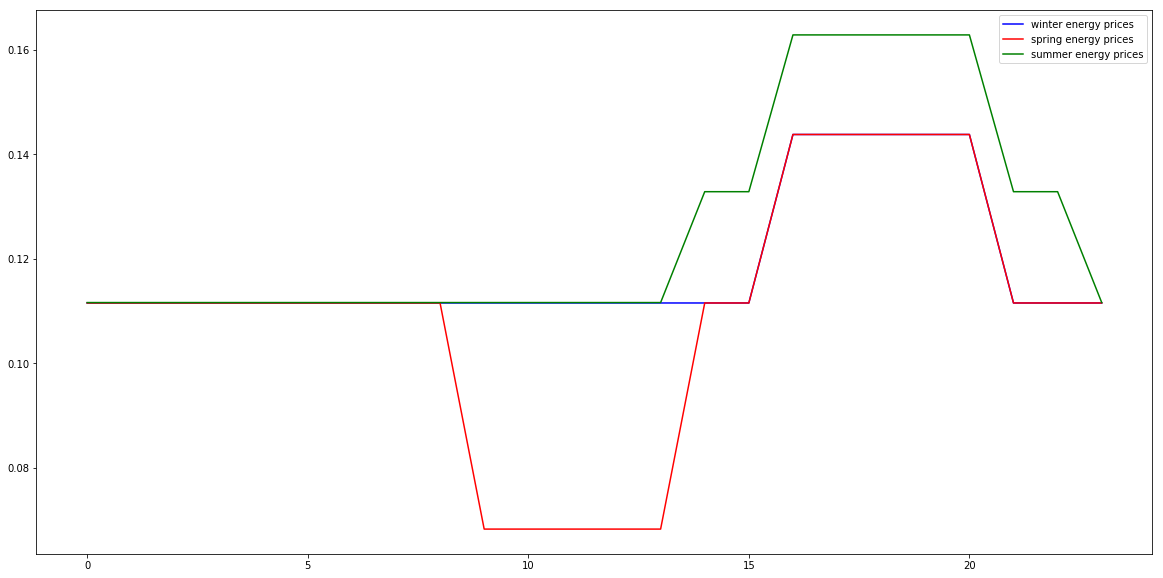

In [8]:
winter_e_prices = []
for i in energy_schedule[1]:
    winter_e_prices.append(energy_rates[i])
spring_e_prices = []
for i in energy_schedule[4]:
    spring_e_prices.append(energy_rates[i])
summer_e_prices = []
for i in energy_schedule[7]:
    summer_e_prices.append(energy_rates[i])
plt.figure(figsize=(20,10))
plt.plot(winter_e_prices, 'blue')
plt.plot(spring_e_prices, 'red')
plt.plot(summer_e_prices, 'green')
plt.legend(['winter energy prices', 'spring energy prices', 'summer energy prices'])

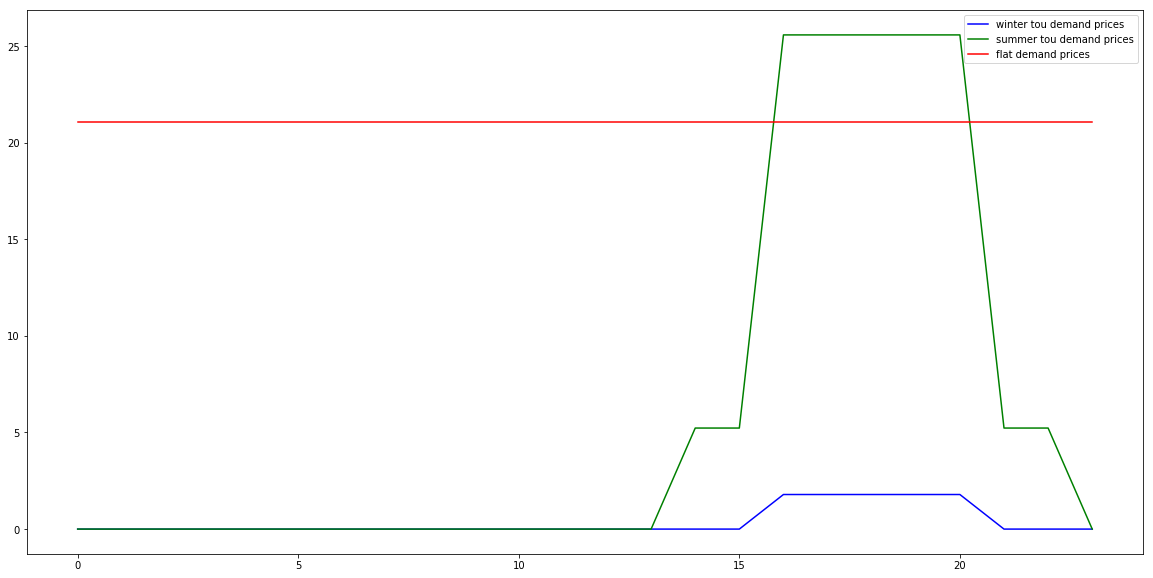

In [9]:
winter_d_prices = []
flat_d_prices = []
for i in demand_schedule[1]:
    if i == 0:
        winter_d_prices.append(0)
    else:
        winter_d_prices.append(demand_rates[i])
    flat_d_prices.append(demand_rates[0])
    
summer_d_prices = []
for i in demand_schedule[7]:
    if i == 0:
        summer_d_prices.append(0)
    else:
        summer_d_prices.append(demand_rates[i])
plt.figure(figsize=(20,10))
plt.plot(winter_d_prices, 'blue')
plt.plot(summer_d_prices, 'green')
plt.plot(flat_d_prices, 'red')
plt.legend(['winter tou demand prices', 'summer tou demand prices', 'flat demand prices'])

In [10]:
# tariff_data = OpenEI_tariff(utility_id='14328',
#                   sector='Commercial',
#                   tariff_rate_of_interest='B-19',
#                   distrib_level_of_interest='secondary',
#                   phasewing=None,  
#                   tou=True)
# tariff_data.read_from_json()
# cost_calculator = CostCalculator()
# tariff_struct_from_openei_data(tariff_data, cost_calculator)
# timestep = TariffElemPeriod.QUARTERLY

In [11]:
# price_df, map = cost_calculator.get_electricity_price((start_date_sig, end_date_sig), timestep)
# price_df = price_df[['customer_energy_charge', 'customer_demand_charge_season', 'customer_demand_charge_tou']]
# # price_df = price_df.loc[~price_df.index.isin(price_df.loc["2020-03-08 02"].index)]
# # price_df = price_df.tz_localize(tz_local, ambiguous=True)

In [12]:
# price_df.plot(figsize=(20,10))

In [13]:
# price_df2 = price_df.copy(deep=True)
# price_df2 = price_df2.loc[~price_df2.index.isin(price_df.loc["2020-02-29"].index)]

In [14]:
# p2013 = pd.DataFrame(index = pd.date_range(start='1/1/2013 00:00:00', end='12/31/2013 23:59:59', freq='15T'), data=price_df2.values, columns=price_df2.columns)
# p2014 = pd.DataFrame(index = pd.date_range(start='1/1/2014 00:00:00', end='12/31/2014 23:59:59', freq='15T'), data=price_df2.values, columns=price_df2.columns)
# p2015 = pd.DataFrame(index = pd.date_range(start='1/1/2015 00:00:00', end='12/31/2015 23:59:59', freq='15T'), data=price_df2.values, columns=price_df2.columns)
# p2016 = pd.DataFrame(index = pd.date_range(start='1/1/2016 00:00:00', end='12/31/2016 23:59:59', freq='15T'), data=price_df.values, columns=price_df.columns)
# p2017 = pd.DataFrame(index = pd.date_range(start='1/1/2017 00:00:00', end='12/31/2017 23:59:59', freq='15T'), data=price_df2.values, columns=price_df2.columns)
# p2018 = pd.DataFrame(index = pd.date_range(start='1/1/2018 00:00:00', end='12/31/2018 23:59:59', freq='15T'), data=price_df2.values, columns=price_df2.columns)
# p2019 = pd.DataFrame(index = pd.date_range(start='1/1/2019 00:00:00', end='12/31/2019 23:59:59', freq='15T'), data=price_df2.values, columns=price_df2.columns)
# p2020 = pd.DataFrame(index = pd.date_range(start='1/1/2020 00:00:00', end='12/31/2020 23:59:59', freq='15T'), data=price_df.values, columns=price_df.columns)

In [15]:
# p = pd.concat([p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020])

In [16]:
# p = p.loc[~p.index.isin(p.loc["2013-03-10 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2014-03-09 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2015-03-08 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2016-03-13 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2017-03-12 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2018-03-11 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2019-03-10 02"].index)]
# p = p.loc[~p.index.isin(p.loc["2020-03-08 02"].index)]

In [17]:
# p.tz_localize(tz_local, ambiguous=True).to_csv("price2013_2020.csv")

# Plotting the prices for the B-19 tariffs

In [18]:
# winter_prices = price_df['2020-01-01']
# spring_prices = price_df['2020-04-01']
# summer_prices = price_df['2020-07-01']
# winter_prices.index = winter_prices.index.time
# spring_prices.index = spring_prices.index.time
# summer_prices.index = summer_prices.index.time

## Energy Prices

In [19]:
# plt.figure(figsize=(20,10))
# plt.plot(spring_prices['customer_energy_charge'])
# plt.plot(summer_prices['customer_energy_charge'])
# plt.plot(winter_prices['customer_energy_charge'])
# plt.legend(['Spring', 'Summer', 'Winter'])
# plt.ylabel("$ per kWh")

## Flat demand prices

In [20]:
# plt.figure(figsize=(20,10))
# plt.plot(spring_prices['customer_demand_charge_season'])
# plt.plot(summer_prices['customer_demand_charge_season'])
# plt.plot(winter_prices['customer_demand_charge_season'])
# plt.legend(['Spring', 'Summer', 'Winter'])
# plt.ylabel("$ per kW")

## TOU demand prices

In [21]:
# plt.figure(figsize=(20,10))
# plt.plot(spring_prices['customer_demand_charge_tou'])
# plt.plot(summer_prices['customer_demand_charge_tou'])
# plt.plot(winter_prices['customer_demand_charge_tou'])
# plt.legend(['Spring', 'Summer', 'Winter'])
# plt.ylabel("$ per kW")